### $p$-value

고전적 회귀 분석 프레임워크는 올바른 모델 사양, 상호 상관없는 회귀 분석기 또는 백색 잡음 잔차 등 적합화된 모델에 관한 여러 가지 가정을 한다. 그러한 가정이 사실이라는 것을 조건으로, 연구자들은 가설 검정은 통해 설명 변수의 중요도를 결정하는 것을 목표로 한다. 변수의 중요도를 표현하는 일반적인 방법은 1700년대로 거슬러 올라가는 개념인 $p$-value를 통해서다. $p$-value는 해당 변수와 관련된 실제 계수가 0일 때 우리가 추정했던 것과 같거나 더 극단적인 결과를 얻었을 확률을 계량화한다. 이는 데이터가 설정된 통계 모델과 얼마나 일치하지 않는지를 나타낸다. 그러나 $p$-value는 귀무가설이나 대립가설이 참이 아니거나 데이터가 랜덤일 확률을 측정하지 않는다. 그리고 $p$-value는 효과의 크기나 결과의 유의성을 측정하지 않는다. $p$-value의 오용은 매우 광범위하게 퍼져 있어서 미국 통계협회는 통계적 유의성의 척도로서 앞으로 그들의 적용을 권장하고 있지 않다(Wasserstein et al. 2019). 이것은 금융에서의 수십 년간의 실증 연구에 의문을 제기한다. $p$-value의 대안을 찾으려면 우선 $p$-value의 함정을 이해해야 한다.

In [1]:
import pandas as pd
import numpy as np
from FinancialMachineLearning.generator.classification_data import get_test_data

#### 1. A Few Caveats of $p$-values

$p$-value의 첫 번째 결함은 앞에서 설명한 강력한 가정에 의존한다는 것이다. 그러한 가정들이 정확하지 않을 때 $p$-value 계수의 참 값이 0이더라도 $p$-value이 낮을 수 있고(false positive), 계수의 참 값이 0이 아님에도 $p$-value이 높을 수 있다(false negative).

$p$-value의 두 번째 결함은 높은 다중 공선 설명 변수에 대해 $p$-value를 강건하게 추정할 수 없다는 것이다. 다중 공선 시스템에서 전통적인 회귀 분석 방법은 중복 설명 변수를 구별할 수 없으므로 관련 $p$-value 간의 대체 효과가 발생한다.

$p$-value의 세 번째 결함은 완전히 관련이 없는 확률을 평가한다는 것이다. 귀무가설 $H_0$과 추정된 계수 $\hat{\beta}$이 주어졌을 때 $p$-value은 $H_0$이 참인 경우 $\hat{\beta}$와 같거나 극단적인 결과를 얻을 확률을 추정한다. 그러나 연구자들은 종종 다른 확률, 즉 $\hat{\beta}$를 관찰했을 때 $H_0$이 참일 확률에 더 관심이 있다. 이 확률은 베이즈 정리를 사용해 계산할 수 있다. 단 추가 가정(베이즈 사전 확률)을 해야 한다.

요약하면 $p$-value는 정말로 필요하지 않은 확률(세 번째 결함)의 잡음이 많은 추정치(두 번째 결함)를 생산하고자 많은 가정(첫 번째 결함)을 하도록 요구하고 있으며, 이는 샘플 외로 일반화되지 않을 수 있다(네 번째 결함). 이들은 불필요한 걱정이 아니다. 이론적으로 고전적 방법의 주요 장점은 설명 변수들 간에 유의성을 투명하게 귀속시킨다는 것이다. 그러나 그 고전적 귀속에는 실제로 매우 많은 결함이 있기 때문에 아마도 고전적 방법은 그러한 결함을 극복하는 현대적 계산 기법으로부터 도움을 어느 정도 받을 수 있을 것이다.

#### 2. A Numerical Example

40개의 특성으로 구성된 이진수의 무작위 분류 문제를 고려하자. 여기서 5개는 정보성이 있고, 30개는 중복되고, 5개는 잡음이다. 아래의 코드는 정보성, 중복, 잡음을 생성하는 함수이다. 정보성이 있는 특성은 label 생성에 사용되는 특성이다. 중목 특성은 임의로 선택한 정보성 특성에 가우시안 잡음을 추가해 형성한 특성이다.(sigma std 값이 낮을수록 대체 효과가 크다). 잡음 특성은 label 생성에 사용되지 않는 특성이다.

In [2]:
trnsX, cont = get_test_data(
    n_features = 40, 
    n_informative = 5, 
    n_redundant = 30, 
    n_samples = 10000,
    sigma_std = 0.1,
    random_state = 0
)

In [3]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

ols = sm.Logit(cont['bin'], trnsX).fit()

Optimization terminated successfully.
         Current function value: 0.380271
         Iterations 7


아래의 그림은 해당 형상에 대한 logit regression에서 발생하는 $p$-value를 나타낸다. 수평 막대는 $p$-value을 나타내고, 수직 점선은 5%의 유의 수준을 표시한다. 35개의 비잡음 특성 중 4개, 즉 I_1, R_29, R_27, I_3만이 통계적으로 유의한 것으로 간주된다. 잡음 특성은 상대적으로 중요한 것으로 분류된다. 가장 중요도가 낮은 14개의 특성은 잡음이 아니다. 간단히 말해서 이러한 $p$-value는 앞서 설명한 이유로 배후의 진실을 잘못 전달한다.

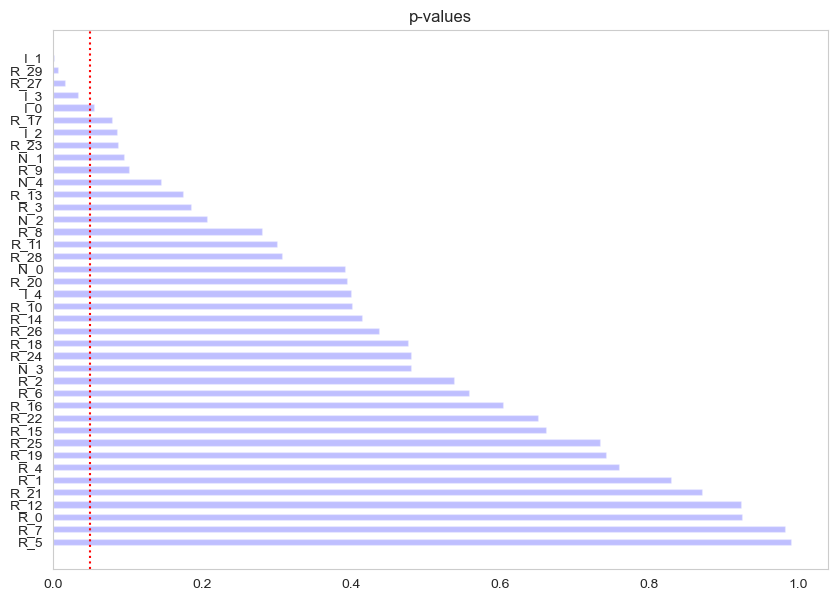

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
plt.barh(
    ols.pvalues.sort_values(ascending = False).index, 
    ols.pvalues.sort_values(ascending = False), 
    color = 'b', alpha = 0.25, height = 0.5
)
plt.axvline(0.05, ls = ':', color = 'r')
plt.grid(False)
plt.title('p-values')
plt.show()

불행히도 금융 데이터셋은 시장, 섹터, 등급, 가치, 모멘텀, 이익의 질, 기간 등 투자 환경의 많은 부분에서 공유하는 공통 위험 요인의 결과로서 고도로 다중 공선인 경향이 있다. 이런 상황에서 금융 연구자들은 $p$-value에만 의존하는 것을 중단해야 한다. 금융 연구자들이 특정 현상에 어떤 변수가 정보를 담고 있는지 판단하기 위한 추가 방법을 숙지하는 것이 중요하다.